In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import re

Modul 2: Data Analysis – Data Visualization
With matplotlib & seaborn

1. Tampilkan visualisasi yang menggambarkan persebaran harga rumah secara keseluruhan!
2. Tampilkan visualisasi yang menggambarkan rata-rata harga rumah berdasarkan Region Name!
3. Tampilkan visualisasi yang menggambarkan jumlah rumah untuk tiap tipe rumah (Type)!
4. Tampilkan visualisasi yang menunjukkan nilai korelasi antara variabel 'Rooms', 'Price', 'Distance',
'BuildingArea', 'YearBuilt'! Variabel apa yang memiliki korelasi paling kuat dengan harga rumah
(Price)?
5. Tampilkan visualisasi yang menggambarkan korelasi antara variabel BuildingArea dan Price! Sebelum
divisualisasikan, hapus dahulu (sementara) rumah dengan Building Area yang lebih dari 2000 m2
(karena dianggap sebagai outlier)!
6. Dari visualisasi nomor sebelumnya, tambahkan variabel Type (tipe rumah) ke dalam visualisasi
sehingga korelasi antara luas bangunan (Buliding Area) dan harga rumah (Price) juga dapat
diobservasi berdasarkan tipenya (Type)!
7. Tampilkan visualisasi yang menggambarkan perubahan jumlah rumah yang dijual dari Jan 2016 - Des
2017!
8. Tampilkan visualisasi yang menggambarkan perbandingan dari persebaran harga rumah (Price)
berdasarkan tipe rumah (Type)! Rumah di harga berapa untuk sebuah rumah bertipe "t"
(townhouse) bisa dikatakan sebagai outlier?

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
index_car_kosong = df[df['Car'].isnull()].index

In [6]:
df['Car'].mode()

0    2.0
Name: Car, dtype: float64

In [7]:
df['Car'] = df['Car'].fillna(2.0)

In [8]:
index_buildingarea_kosong = df[df['BuildingArea'].isnull()].index
index_buildingarea_kosong

Int64Index([    0,     3,     5,     8,    10,    13,    14,    18,    21,
               26,
            ...
            13561, 13562, 13565, 13566, 13567, 13569, 13570, 13574, 13575,
            13577],
           dtype='int64', length=6450)

In [9]:
df.iloc[index_buildingarea_kosong]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,2.0,1.0,0.0,181.0,NaN,NaN,Yarra,-37.80410,144.99530,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,1.0,1.0,1.0,0.0,NaN,NaN,Yarra,-37.80080,144.99730,Northern Metropolitan,4019.0
10,Abbotsford,411/8 Grosvenor St,2,u,700000.0,VB,Jellis,12/11/2016,2.5,3067.0,2.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81100,145.00670,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13569,Wantirna South,12 Armagh Cr,4,h,1323000.0,S,Barry,26/08/2017,14.7,3152.0,4.0,2.0,2.0,551.0,NaN,NaN,NaN,-37.87608,145.22390,Eastern Metropolitan,7082.0
13570,Wantirna South,34 Fewster Dr,3,h,970000.0,S,Barry,26/08/2017,14.7,3152.0,3.0,2.0,2.0,674.0,NaN,NaN,NaN,-37.88360,145.22805,Eastern Metropolitan,7082.0
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,3.0,2.0,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0


In [10]:
df.groupby(by='Price').count()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Price,,,,,,,,,,,,,,,,,,,,
85000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
131000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
145000.0,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2
160000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
170000.0,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
6500000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7650000.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


([<matplotlib.axis.XTick at 0x16782ed5210>,
 [Text(0, 0, '0'), Text(500, 0, '500'), Text(20, 0, '20')])

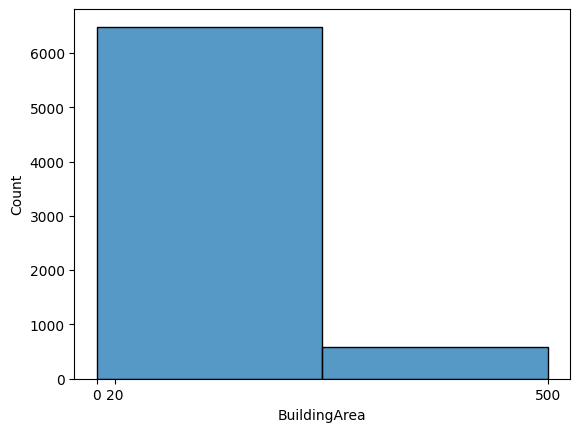

In [11]:
sns.histplot(data=df, x='BuildingArea', bins=10, binrange=(0,500), binwidth=250)
plt.xticks(ticks= (0,500,20))

In [12]:
df['BuildingArea'] = df.groupby('Price')['BuildingArea'].apply(lambda x: x.fillna(x.mean()))
df

C:\Users\user\AppData\Local\Temp\ipykernel_12980\1359707055.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df['BuildingArea'] = df.groupby('Price')['BuildingArea'].apply(lambda x: x.fillna(x.mean()))


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,161.875000,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,134.101210,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,152.750000,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.076923,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [13]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())

In [14]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<AxesSubplot: xlabel='YearBuilt', ylabel='Count'>

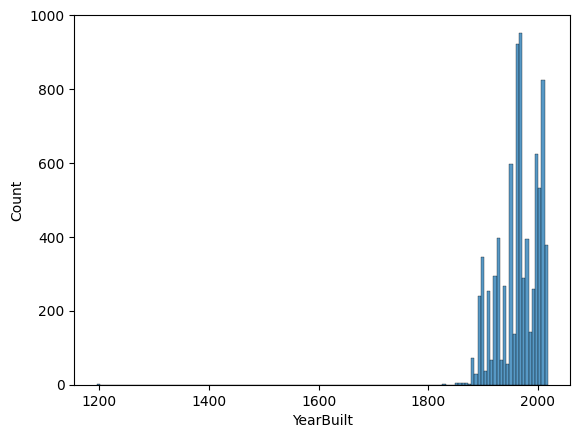

In [15]:
sns.histplot(data=df, x='YearBuilt')

In [16]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

<AxesSubplot: xlabel='CouncilArea', ylabel='Count'>

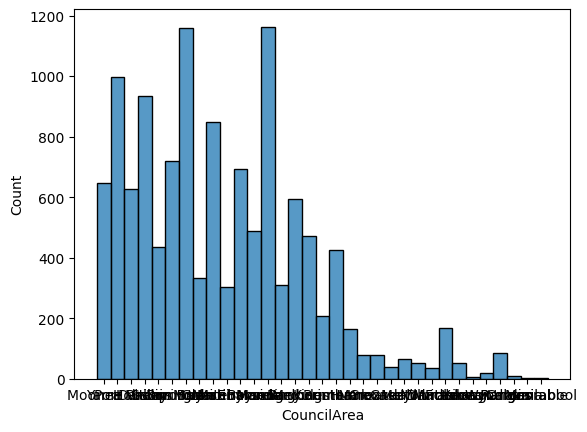

In [17]:
sns.histplot(data=df, x='CouncilArea')

In [18]:
df['CouncilArea'].mode()

0    Moreland
Name: CouncilArea, dtype: object

In [19]:
df['CouncilArea'] = df['CouncilArea'].fillna('Moreland')

In [20]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [21]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,161.875000,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,134.101210,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,152.750000,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.076923,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


1. Tampilkan visualisasi yang menggambarkan persebaran harga rumah secara keseluruhan!

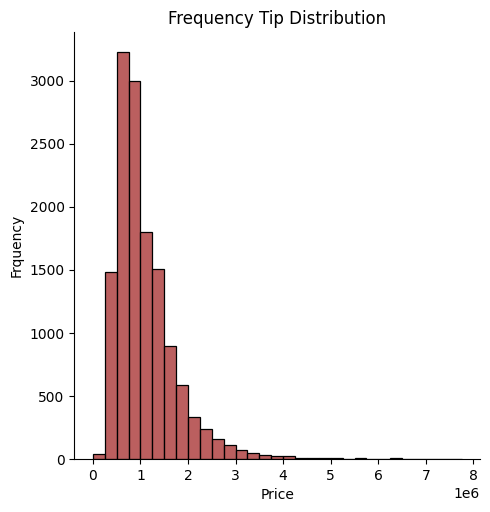

In [22]:
sns.displot(data= df, x='Price',color= 'brown',bins= range(0,8000000,250000))
plt.title('Frequency Tip Distribution')
plt.ylabel('Frquency')
# plt.xticks(ticks= range(0,11,1))

plt.show()

Insight:
- Persebaran data Price adalah right-skewed
- Terhitingu outlier jika harganya diatas 2350000 dan di bawah -370000
- Harga Yang Paling Banyak Rumahnya Ada Di Range 500000 - 749999 dengan 3224 Rumah
- Harga Rumah Paling Mahal Ada Di Harga 9000000
- Harga Rumah Paling Murah Ada Di Harga 85000

In [23]:
df['Price'].max()

9000000.0

In [24]:
df['Price'].min()

85000.0

In [25]:
len(df[df['Price'].between(500000,749999)])

3224

In [26]:
df['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [27]:
q1_price = df['Price'].quantile(0.25)
q1_price

650000.0

In [28]:
q2_price = df['Price'].quantile(0.50)
q2_price

903000.0

In [29]:
q3_price = df['Price'].quantile(0.75)
q3_price

1330000.0

In [30]:
price_iqr = q3_price - q1_price
price_iqr

680000.0

In [31]:
price_higher_outlier = q3_price + (1.5*price_iqr)
price_higher_outlier

2350000.0

In [32]:
price_lower_outlier = q1_price - (1.5*price_iqr)
price_lower_outlier

-370000.0

2. Tampilkan visualisasi yang menggambarkan rata-rata harga rumah berdasarkan Region Name!

Text(0.5, 1.0, 'Average House Price For Each Region')

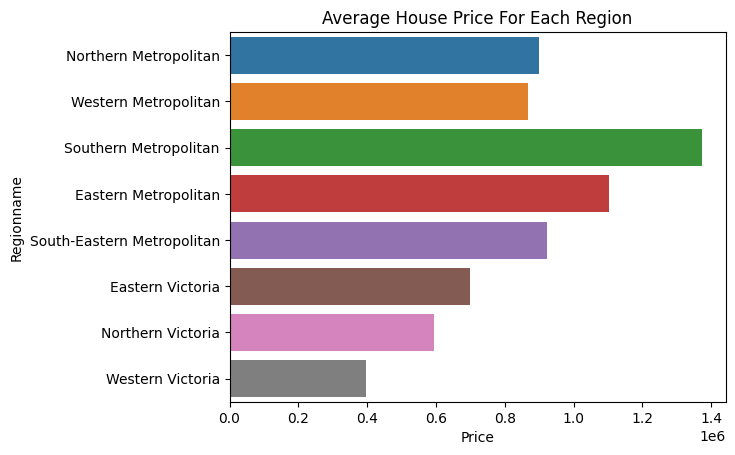

In [33]:
sns.barplot(data= df, x='Price', y='Regionname', estimator=np.mean, errorbar=('ci',0))
plt.title('Average House Price For Each Region')

# Insight:
- Region Yang Memiliki Rata-Rata Harga Paling Tinggi Adalah Southern Metropolitan
- Region Yang Memilki Rata-Rata Harga Paling Rendah Adalah Western Victoria
- Diantara semua Victoria, Victoria Easten > Northern Victoria > Western Victoria
- Diantara Semua Metropolitan, Southern > Eastern > South-Eastern > Northern > Western

In [34]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,161.875000,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,134.101210,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,152.750000,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.076923,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


3. Tampilkan visualisasi yang menggambarkan jumlah rumah untuk tiap tipe rumah (Type)!

<AxesSubplot: xlabel='Type', ylabel='count'>

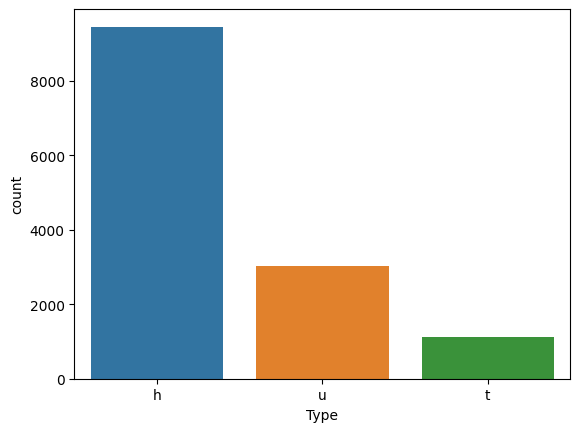

In [35]:
sns.countplot(data=df,x='Type')

Insight:
- Jumlah Rumah Yang Paling banyak Adalah Tipe H dengan 9449 Rumah
- Jumlah Rumah Yang Paling Dikit Adalah Tipe T dengan 1114 Rumah
- Semakin Murah rumah Semakin Banyak Yang beli, begitupun sebaliknya


In [36]:
df.groupby(by='Type')['Price'].mean()

Type
h    1.242665e+06
t    9.337351e+05
u    6.051275e+05
Name: Price, dtype: float64

4. Tampilkan visualisasi yang menunjukkan nilai korelasi antara variabel 'Rooms', 'Price', 'Distance',
'BuildingArea', 'YearBuilt'! Variabel apa yang memiliki korelasi paling kuat dengan harga rumah
(Price)?

<AxesSubplot: >

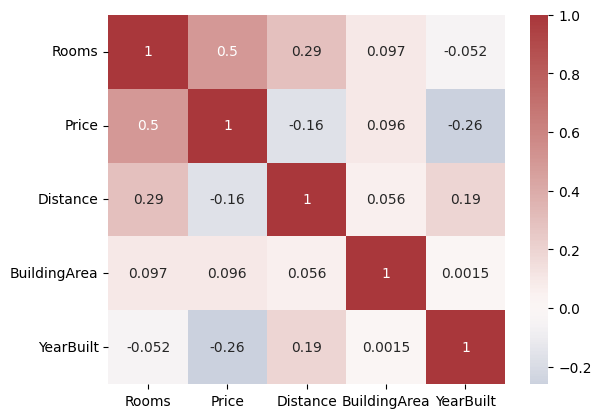

In [37]:
sns.heatmap(data=df[['Rooms','Price','Distance','BuildingArea','YearBuilt']].corr(), annot= True, cmap='vlag', center=0)

5. Tampilkan visualisasi yang menggambarkan korelasi antara variabel BuildingArea dan Price! Sebelum
divisualisasikan, hapus dahulu (sementara) rumah dengan Building Area yang lebih dari 2000 m2
(karena dianggap sebagai outlier)!

In [38]:
index_lebih_2000 =df[df['BuildingArea'] > 2000].index

In [39]:
df_sementara = df.drop(index=index_lebih_2000)

In [40]:
df_sementara

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,161.875000,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,134.101210,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,152.750000,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.076923,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0


<AxesSubplot: >

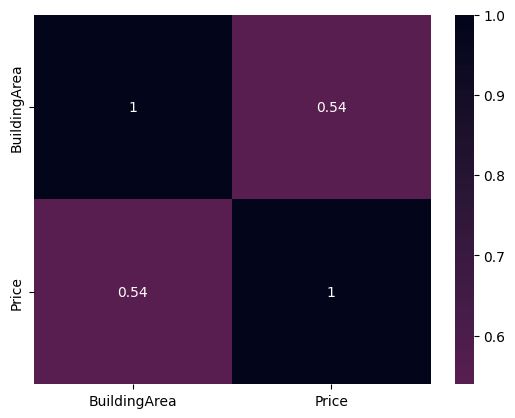

In [41]:
sns.heatmap(data=df_sementara[['BuildingArea','Price']].corr(), annot= True, cmap='rocket_r', center=0)

<AxesSubplot: xlabel='BuildingArea', ylabel='Price'>

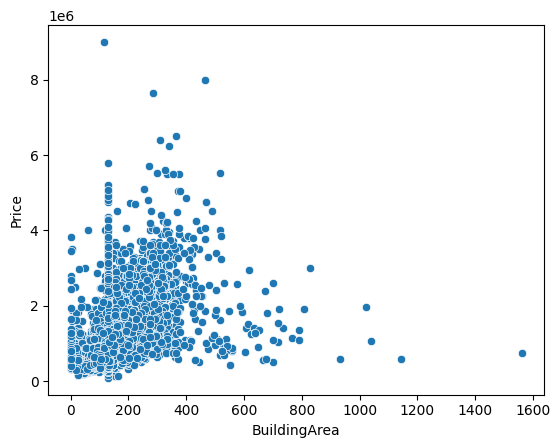

In [42]:
sns.scatterplot(data=df_sementara, x='BuildingArea',y='Price')

Insight:
- korelasi antara price dan building area sedang

6. Dari visualisasi nomor sebelumnya, tambahkan variabel Type (tipe rumah) ke dalam visualisasi
sehingga korelasi antara luas bangunan (Buliding Area) dan harga rumah (Price) juga dapat
diobservasi berdasarkan tipenya (Type)!

In [43]:
df_h= df_sementara[df_sementara['Type'] == 'h']
df_t= df_sementara[df_sementara['Type'] == 't']
df_u= df_sementara[df_sementara['Type'] == 'u']

Text(0.5, 1.0, 'Type u')

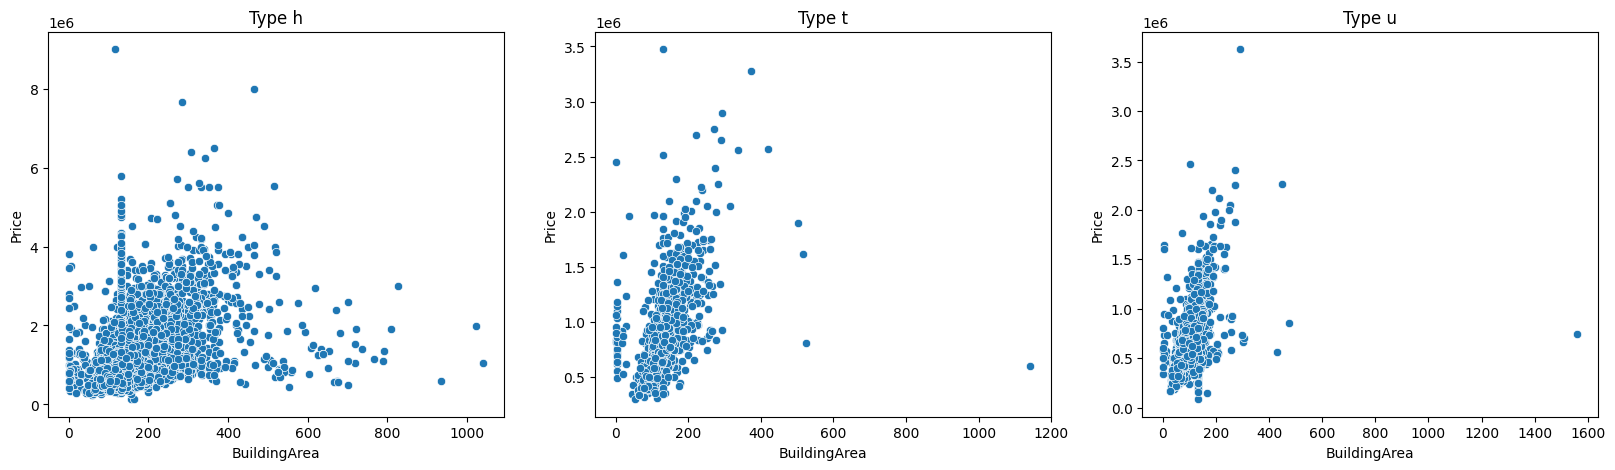

In [44]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df_h, x='BuildingArea', y='Price')
plt.title('Type h')


plt.subplot(1,3,2)
sns.scatterplot(data=df_t, x='BuildingArea', y='Price')
plt.title('Type t')


plt.subplot(1,3,3)
sns.scatterplot(data=df_u, x='BuildingArea', y='Price')
plt.title('Type u')

In [45]:
h = df_h['BuildingArea'].corr(df_h['Price'],method='pearson')
t = df_t['BuildingArea'].corr(df_t['Price'],method='pearson')
u = df_u['BuildingArea'].corr(df_u['Price'],method='pearson')

display(h,t,u)

0.4563931234663353

0.45776847077804944

0.5214206969817471

Insight:
- Correlation Type H 0.4563931234663353 Sedang Positif
- Correlation Type T 0.45776847077804944 Sedang Positif
- Correlation Type U 0.5214206969817471 Sedang Positif

7. Tampilkan visualisasi yang menggambarkan perubahan jumlah rumah yang dijual dari Jan 2016 - Des
2017!

In [46]:
bulan = df['Date'].str.extract('[0-9]/([0-9]{2})/\d+')
bulan

,0
0,12
1,02
2,03
3,03
4,06
...,...
13575,08
13576,08
13577,08
13578,08


In [47]:
df = df.rename(columns={'Month/Year':'Month'})

In [48]:
df['Month'] = bulan

In [49]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,161.875000,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,12
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,02
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,03
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,134.101210,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,03
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,152.750000,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,08
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0,08
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.076923,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0,08
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0,08


In [50]:
tahun = df['Date'].str.extract('[0-9]/[0-9]{2}/(\d+)')
tahun

,0
0,2016
1,2016
2,2017
3,2017
4,2016
...,...
13575,2017
13576,2017
13577,2017
13578,2017


In [51]:
df.insert(22,'Year',tahun)

In [52]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,161.875000,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,12,2016
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,02,2016
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,03,2017
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,134.101210,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,03,2017
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,06,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,152.750000,1981.0,Moreland,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,08,2017
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.000000,1995.0,Moreland,-37.85927,144.87904,Western Metropolitan,6380.0,08,2017
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,144.076923,1997.0,Moreland,-37.85274,144.88738,Western Metropolitan,6380.0,08,2017
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.000000,1920.0,Moreland,-37.85908,144.89299,Western Metropolitan,6380.0,08,2017


In [53]:
df_tahun_bulan = df.sort_values(by=['Year','Month'])

In [54]:
df_tahun_bulan = df_tahun_bulan.reset_index().drop(columns='index')

In [55]:
tahun_bulan_group = df_tahun_bulan.groupby(by=['Year','Month']).count()[['Price']].reset_index()
tahun_bulan_group

,Year,Month,Price
0,2016,01,2
1,2016,02,26
2,2016,04,318
3,2016,05,899
4,2016,06,732
5,2016,07,446
6,2016,08,716
7,2016,09,925
8,2016,10,551
9,2016,11,1114


In [56]:
tahun_bulan_group['Year Month'] =tahun_bulan_group['Year']+' ' + tahun_bulan_group['Month']

In [57]:
tahun_bulan_group.loc[-1] = ['2016','03',0,'2016 03']
tahun_bulan_group.loc[-2] = ['2017','01',0,'2017 01']
tahun_bulan_group.loc[-3] = ['2017','10',0,'2017 10']
tahun_bulan_group.loc[-4] = ['2017','11',0,'2017 11']
tahun_bulan_group.loc[-5] = ['2017','12',0,'2017 12']
tahun_bulan_group.loc[-6] = ['2016','04',0,'2016 04']

In [58]:
tahun_bulan_group.index = tahun_bulan_group.index + 1

In [59]:
df_sementara = tahun_bulan_group.sort_values(by=['Year','Month']).reset_index().drop(columns='index').drop(index=3).reset_index().drop(columns='index')

In [60]:
df_sementara['Price']=df_sementara['Price'].astype(int)
df_sementara['Year Month']=df_sementara['Year Month'].astype(str)

In [61]:
df_sementara['Price'][3]=318

C:\Users\user\AppData\Local\Temp\ipykernel_12980\4068414692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sementara['Price'][3]=318


In [62]:
df_sementara

,Year,Month,Price,Year Month
0,2016,01,2,2016 01
1,2016,02,26,2016 02
2,2016,03,0,2016 03
3,2016,04,318,2016 04
4,2016,05,899,2016 05
5,2016,06,732,2016 06
6,2016,07,446,2016 07
7,2016,08,716,2016 08
8,2016,09,925,2016 09
9,2016,10,551,2016 10


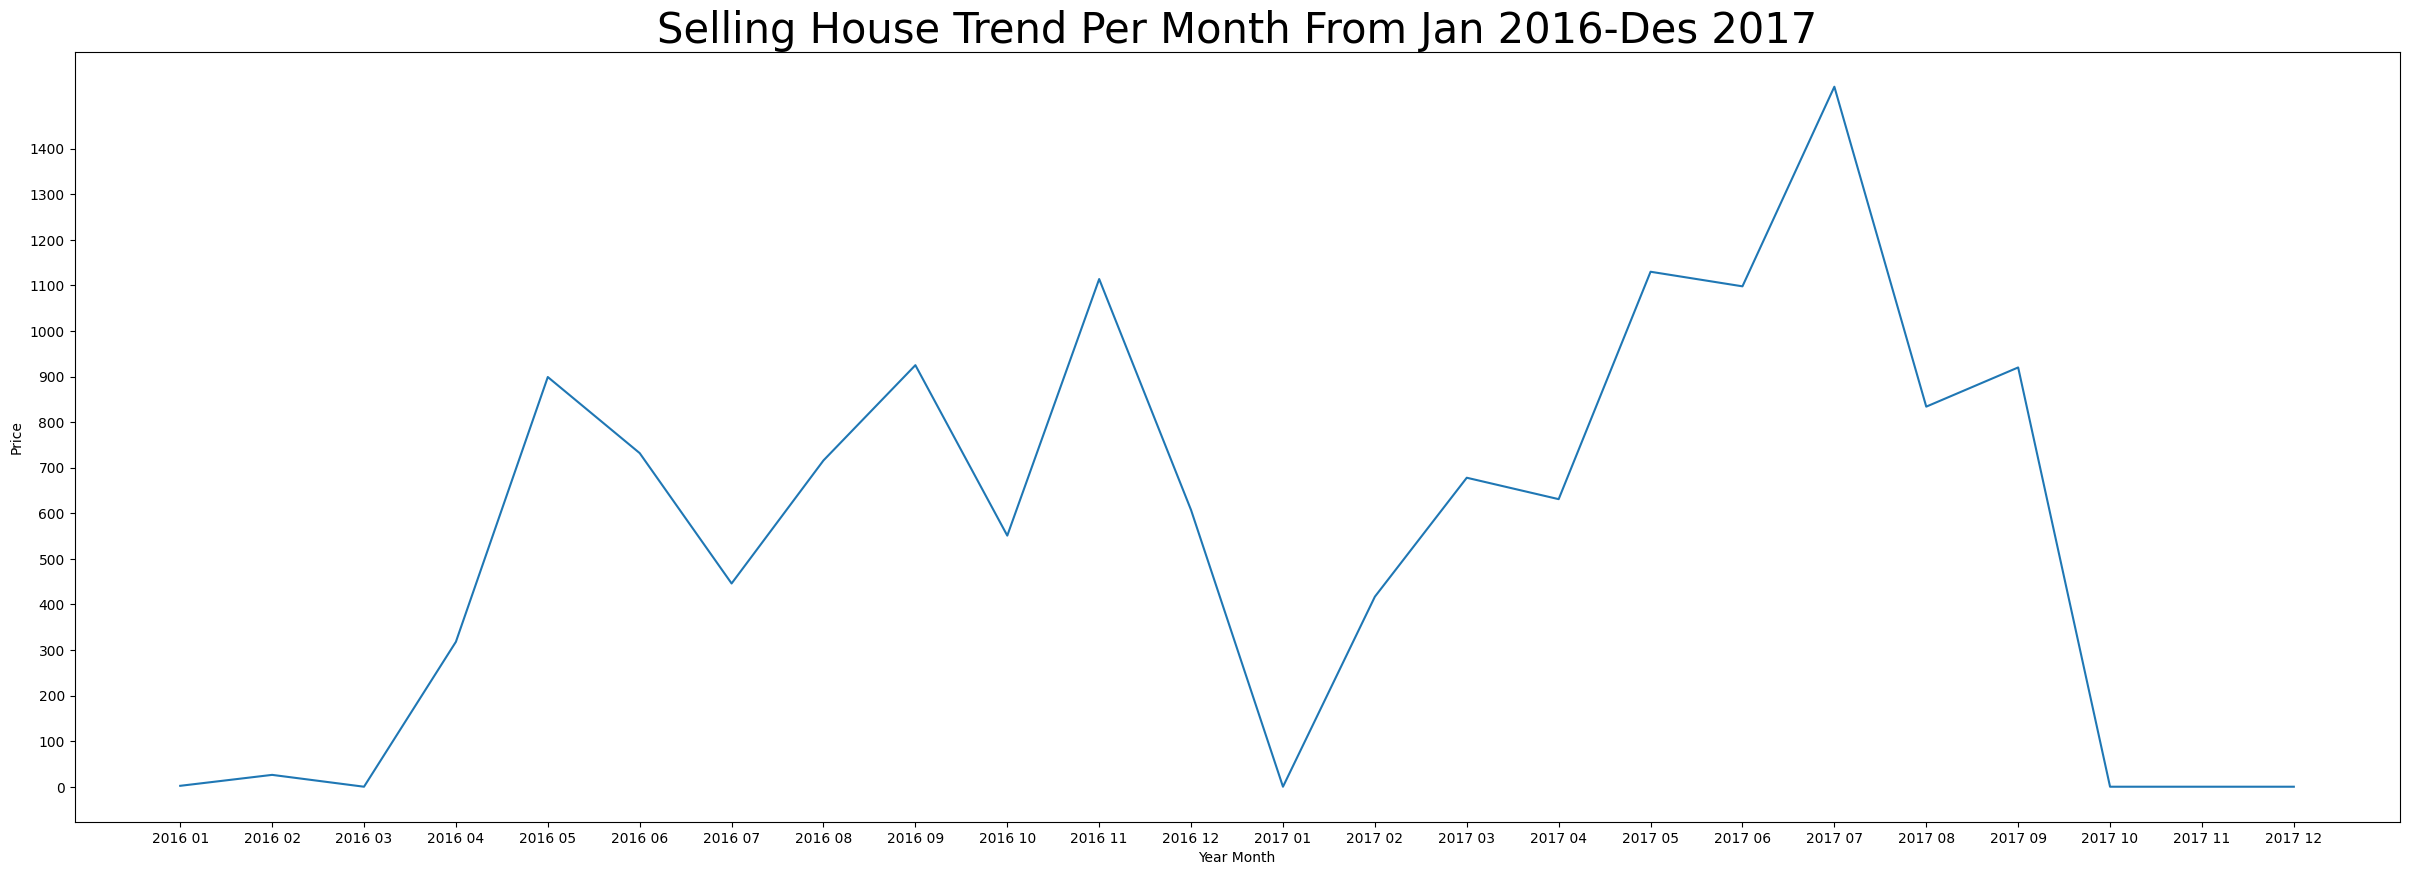

In [63]:
plt.figure(figsize= (30,10))
sns.lineplot(data= df_sementara, x='Year Month', y='Price', errorbar=('ci',0))
plt.title('Selling House Trend Per Month From Jan 2016-Des 2017', size=30)
plt.yticks(ticks=range(0,1500,100));